<a href="https://colab.research.google.com/github/kazuma313/LicensePlateRecognition/blob/main/LisanceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi plat

## Menggunakan yolo5


In [ ]:
!pip install -U yolov5 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 

In [ ]:
import yolov5

# load model
model = yolov5.load('keremberke/yolov5m-license-plate')

# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image


(…)m-license-plate/resolve/main/config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

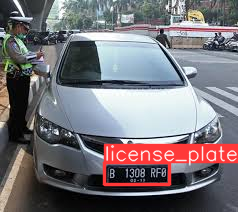

In [ ]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqRrnb-MZYv7Xn_BYZWckXWFJaVwWblN6JeQ&usqp=CAU'
# img = '/content/B2833XKX.jpg'
# img = 'https://asset-2.tstatic.net/jogja/foto/bank/images/ilustrasi-bola-black-and-white.jpg'

# perform inference
results = model(img)

# inference with test time augmentation
# results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

Menggunakan yolo memerlukan waktu yang cukup lama dalam perosesnya

## Menggunakan huggung face Transformers

In [ ]:
!pip install transformers

In [13]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="skiba4/license_plate")

/usr/local/lib/python3.10/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:28: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(


In [3]:
img_no_palet = "https://cdn.rri.co.id/berita/26/images/1678275755219-IMG_20230308_183755_618/1678275755219-IMG_20230308_183755_618.jpg"
img_plat = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzSfUzZP1HTWE03AxXzPgxfRda00UgqFrGEQ&usqp=CAU"

In [4]:
pipe(img_plat)

[{'score': 0.9233072400093079,
  'label': 'LABEL_1',
  'box': {'xmin': 29, 'ymin': 97, 'xmax': 239, 'ymax': 170}}]

In [18]:
pipe.save_pretrained(save_directory="plate_detection_skiba4")

In [16]:
img_url = "https://asset-2.tstatic.net/gorontalo/foto/bank/images/12102022_plat-nomor-putih.jpg"

In [17]:
pipe(img_url)

[{'score': 0.9878003597259521,
  'label': 'LABEL_1',
  'box': {'xmin': 40, 'ymin': 51, 'xmax': 656, 'ymax': 336}}]

In [ ]:
!zip plate_detection_skiba4.zip /content/plate_detection_skiba4

  adding: content/plate_detection_skiba4/ (stored 0%)


In [3]:
if []:
  print("test")

Load model

In [26]:
from transformers import AutoFeatureExtractor, AutoModelForObjectDetection

In [ ]:
from transformers import pipeline

pipe = pipeline("object-detection", model="/content/plate_detection_skiba4")

In [24]:
detect = pipe("/content/B1254TFX.png")
detect

[{'score': 0.9859646558761597,
  'label': 'LABEL_1',
  'box': {'xmin': 37, 'ymin': 7, 'xmax': 478, 'ymax': 198}}]

In [31]:
(detect[0]['box']['xmin'], detect[0]['box']['ymin'])

(37, 7)

In [32]:
(detect[0]['box']['xmax'], detect[0]['box']['ymax'])

(478, 198)